In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.offline as pyo
import matplotlib

In [3]:
repetidos_total_2=pd.read_csv("repetidos_total_2.csv")

In [4]:
desde_1960=[1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,2021]

In [5]:
peso_desde_1960=repetidos_total_2[repetidos_total_2["Year"].isin(desde_1960)]

In [6]:
media_peso_desde_1960=peso_desde_1960.groupby("Year")["Weight"].mean()

In [7]:
media_peso_desde_1960

Year
1960    69.393811
1964    69.686692
1968    69.454786
1972    70.086422
1976    70.066143
1980    70.668078
1984    70.058133
1988    70.224268
1992    71.143607
1996    70.903281
2000    71.119046
2004    71.280695
2008    71.397679
2012    71.319586
2016    70.988637
2021          NaN
Name: Weight, dtype: float64

In [8]:
fig = go.Figure(
    data=go.Scatter(x=media_peso_desde_1960.index, y=media_peso_desde_1960),
    layout=go.Layout(title="Weight Mean on Olympics 1960-2016", xaxis_title="Years", yaxis_title="Weight",yaxis_range=[60,90])
)

fig.show()

pyo.plot(fig, filename='Weight Comparation.html')

'Weight Comparation.html'

In [9]:
peso_60_por_año=peso_desde_1960.groupby("Year")["Weight"].value_counts().reset_index(name="Count")
peso_60_por_año.groupby("Year")["Weight"].value_counts()

Year  Weight
1960  40.0      1
      41.0      1
      43.0      1
      44.0      1
      45.0      1
               ..
2016  155.0     1
      158.0     1
      160.0     1
      165.0     1
      170.0     1
Name: Weight, Length: 1983, dtype: int64

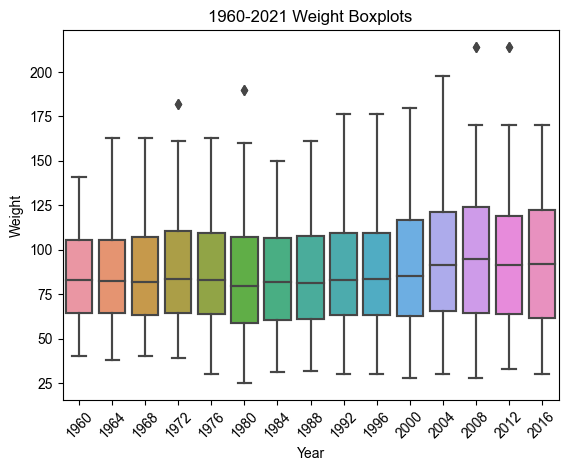

In [10]:
sns.boxplot(x="Year", y="Weight", data=peso_60_por_año)
ax = sns.boxplot(x="Year", y="Weight", data=peso_60_por_año)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title("1960-2021 Weight Boxplots")

sns.set_style("whitegrid")
plt.savefig("Weight Evolution", transparent=True)
plt.show();

In [11]:
solo_atletismo_men=repetidos_total_2[(repetidos_total_2["Sport"]=="Athletics")&(repetidos_total_2["Sex"]=="M")]
solo_atletismo_women=repetidos_total_2[(repetidos_total_2["Sport"]=="Athletics")&(repetidos_total_2["Sex"]=="F")]
media_altura_atletismo_men=solo_atletismo_men.groupby("Year")["Height"].mean()
media_altura_atletismo_women=solo_atletismo_women.groupby("Year")["Height"].mean()

In [12]:
peso_desde_1960_atletismo_men=peso_desde_1960[(peso_desde_1960["Sport"]=="Athletics")&(peso_desde_1960["Sex"]=="M")]
peso_desde_1960_baloncesto_men=peso_desde_1960[(peso_desde_1960["Sport"]=="Basketball")&(peso_desde_1960["Sex"]=="M")]
peso_desde_1960_gimnasia_women=peso_desde_1960[(peso_desde_1960["Sport"]=="Gymnastics")&(peso_desde_1960["Sex"]=="F")]

media_peso_desde_1960_atletismo_men=peso_desde_1960_atletismo_men.groupby("Year")["Weight"].mean()
media_peso_desde_1960_baloncesto_men=peso_desde_1960_baloncesto_men.groupby("Year")["Weight"].mean()
media_peso_desde_1960_gimnasia_women=peso_desde_1960_gimnasia_women.groupby("Year")["Weight"].mean()

In [13]:
media_peso_desde_1960_gimnasia_women

Year
1960    53.795588
1964    53.352321
1968    51.761499
1972    49.934815
1976    47.330677
1980    41.421788
1984    44.055409
1988    43.440613
1992    44.968839
1996    42.355556
2000    44.476578
2004    45.230769
2008    45.661253
2012    48.033742
2016    48.496042
2021          NaN
Name: Weight, dtype: float64

In [14]:
fig1 = go.Figure(
    data=go.Scatter(x=media_peso_desde_1960.index, y=media_peso_desde_1960),
    layout=go.Layout(title="Weight Mean on Olympics 1960-2016", xaxis_title="Years", yaxis_title="Weight",yaxis_range=[60,90])
)

fig2 = go.Figure(data=go.Scatter(x=media_peso_desde_1960_atletismo_men.index, y=media_peso_desde_1960_atletismo_men))
fig3 = go.Figure(data=go.Scatter(x=media_peso_desde_1960_baloncesto_men.index, y=media_peso_desde_1960_baloncesto_men))
fig4 = go.Figure(data=go.Scatter(x=media_peso_desde_1960_gimnasia_women.index, y=media_peso_desde_1960_gimnasia_women))

fig = make_subplots(rows=2, cols=1)
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=2, col=1)
fig.add_trace(fig3.data[0], row=2, col=1)
fig.add_trace(fig4.data[0], row=2, col=1)

fig.update_layout(title='Weight Comparison', height=700, width=1200)

fig.update_xaxes(title_text="Weight Mean on Olympics 1960-2016", row=1, col=1)
fig.update_xaxes(title_text="Male Basket vs Male Athl vs Fem Gymn since 1960",row=2,col=1)
fig.update_yaxes(range=(40,105))

fig.update_layout(showlegend=False)



# Guardar la figura como un archivo HTML

fig.show()

pyo.plot(fig, filename='Weight Comparation.html')

'Weight Comparation.html'

In [15]:
deportes_populares=["Athletic","Basketball","Swimming","Gymnastics","Tennis","Weightlifting","Wrestling"]

In [16]:
data_deportes_populares=repetidos_total_2[repetidos_total_2["Sport"].isin(deportes_populares)&(repetidos_total_2["Weight"].notna())]

In [17]:
#Para reducir la data, ya que es muy grande
data_deportes_populares_sampled = data_deportes_populares.groupby('Sport').apply(lambda x: x.sample(n=100, random_state=42)).reset_index(drop=True)


In [21]:
data_deportes_populares_sampled

,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
0,"Charles Thomas ""Tom"" McMillen",M,20.0,212.0,95.0,United States,USA,1972,Munich,Basketball,Basketball Men's Basketball,Silver
1,Ieva Kublia,F,26.0,192.0,85.0,Latvia,LAT,2008,Beijing,Basketball,Basketball Women's Basketball,NaN
2,Dmitry Vladimirovich Sukharev,M,31.0,208.0,108.0,Unified Team,EUN,1992,Barcelona,Basketball,Basketball Men's Basketball,NaN
3,Irina Ivanovna Rutkovskaya,F,31.0,176.0,67.0,Russia,RUS,2000,Sydney,Basketball,Basketball Women's Basketball,NaN
4,Zdenk Konen,M,24.0,204.0,96.0,Czechoslovakia,TCH,1960,Roma,Basketball,Basketball Men's Basketball,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
595,Aleksey Vladimirovich Medvedev,M,23.0,204.0,120.0,Belarus,BLR,1996,Atlanta,Wrestling,"Wrestling Men's Super-Heavyweight, Freestyle",Silver
596,Horst Stottmeister,M,24.0,182.0,82.0,East Germany,GDR,1972,Munich,Wrestling,"Wrestling Men's Middleweight, Freestyle",NaN
597,Guram Mch'edlidze,M,28.0,178.0,75.0,Georgia,GEO,2000,Sydney,Wrestling,"Wrestling Men's Middleweight, Freestyle",NaN
598,Mitsuru Sato,M,30.0,163.0,59.0,Japan,JPN,1992,Barcelona,Wrestling,"Wrestling Men's Flyweight, Freestyle",NaN


c:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

1

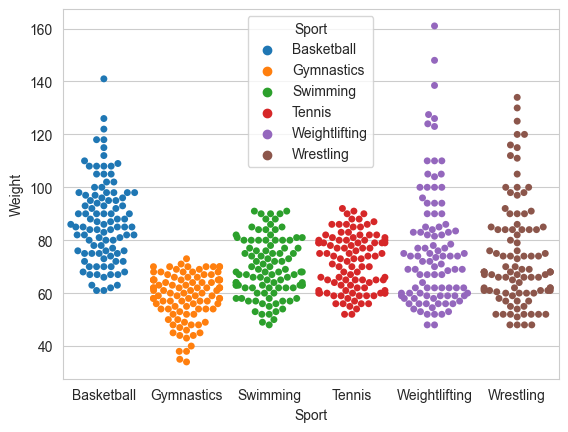

In [24]:
#voy a intentar hacer un swarmplot para ver el peso en relacion con la disciplina y sexo

sns.swarmplot(data=data_deportes_populares_sampled,x="Sport",y="Weight",hue="Sport")
sns.set_style("whitegrid")
plt.savefig("Weight by discipline", transparent=True)

c:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

1

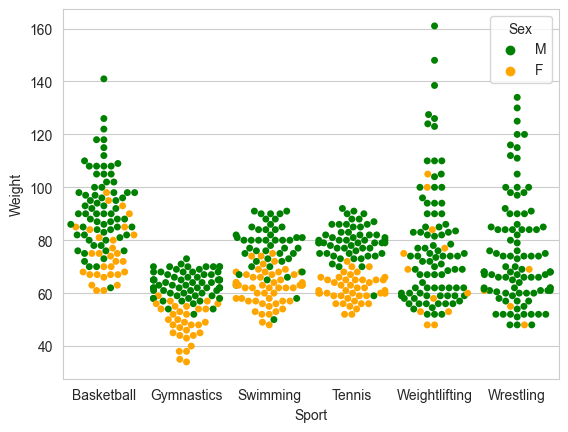

In [30]:
colors = ["green", "orange"]
sns.swarmplot(data=data_deportes_populares_sampled,x="Sport",y="Weight",hue="Sex",palette=colors)
sns.set_style("whitegrid")
plt.savefig("Weight by discipline_Sex", transparent=True)

In [19]:
import seaborn as sns
import pandas as pd

# cargar los datos
data_deportes_populares = pd.read_csv("ruta_del_archivo.csv")

# reducir el número de puntos mostrados a través de una muestra aleatoria
data_deportes_populares_sampled = data_deportes_populares.groupby('Sport').apply(lambda x: x.sample(n=100, random_state=42)).reset_index(drop=True)

# hacer el gráfico con los datos muestreados
sns.swarmplot(data=data_deportes_populares_sampled, x="Sport", y="Weight", hue="Sport")

FileNotFoundError: [Errno 2] No such file or directory: 'ruta_del_archivo.csv'